In [7]:
%matplotlib inline

from mPW import *

from helper_functions import *
from example_graphs import *

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Basic use

The *modified Petford-Welsh algorithm* `mPW` can be invoked in many different ways – at the very least, the graph `g` to be clustered and an initial number of clusters `k` need to be specified (any upper bound on the number of clusters may be taken, e.g., the total number of vertices). 

In [8]:
c, badVert, badEdges, times = mPW(g=g_dolphins, k=len(g_dolphins.vs))

## Visualisation

The generated clustering solution `c` can be visualised by means of the helper function `plot_clusters`. 

,Frequency
Colour,
0,41
1,21


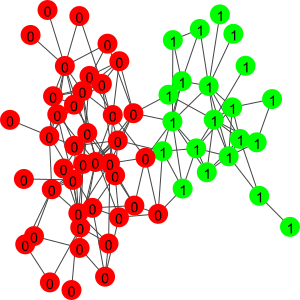

In [9]:
plot_clusters(g_dolphins, c)

Note that the ground truth clustering (when given) is stored in the `cluster` vertex attribute.

,Frequency
Colour,
0,42
1,20


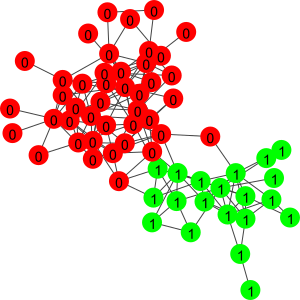

In [10]:
plot_clusters(g_dolphins, g_dolphins.vs['cluster'])

## Optional parameters and fine-tuning

### The weight parameter `w`

In addition to the initial number of clusters `k`, the weight parameter `w` can also be varied.

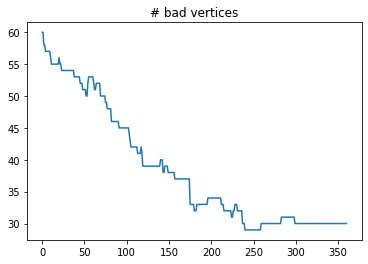

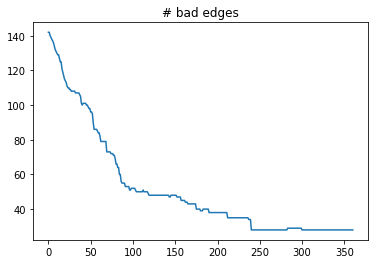

In [11]:
c, badVert, badEdges, times = mPW(g=g_dolphins, k=10, w=10)
plot_results(badVert, badEdges)

### Fine-tuning

There are also two fine-tuning procedures. Setting `fine_tun1 = 1` will recolour every leftover singleton cluster with the most frequent colour in its neighbourhood.


In [12]:
c, badVert, badEdges, times = mPW(g=g_dolphins, k=10, fine_tun1=1)

To refine the solution even further, `fine_tun2 = 1` will recolour every *vertex* with the most frequent colour in its neighbourhod.


In [14]:
c, badVert, badEdges, times = mPW(g=g_dolphins, k=10, fine_tun2=1)

If needed, both fine-tuning mechanisms can be used.

In [16]:
c, badVert, badEdges, times = mPW(g=g_dolphins, k=10, fine_tun1=1, fine_tun2=1)

## Stopping criteria

### Sufficiently low sliding-window variance (`Var` < `tol`)

In the examples above, the sliding-window variance was used as a stopping criterion (with the default values of `window_size = len(g.vs)` and `tol=0.001`).

Note that one could also use custom values for `window_size` and/or `tol` instead.

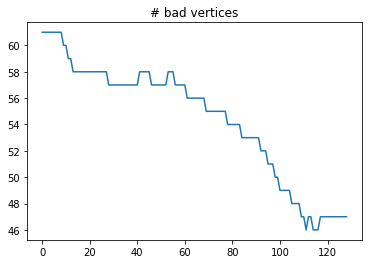

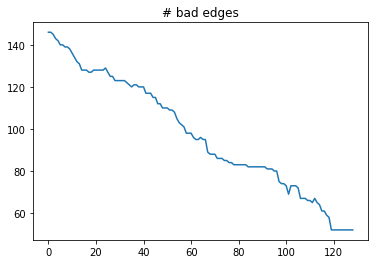

In [17]:
c, badVert, badEdges, times = mPW(g=g_dolphins, k=10, window_size=10)
plot_results(badVert, badEdges)

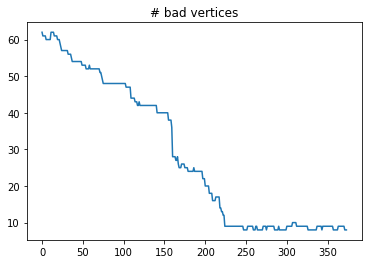

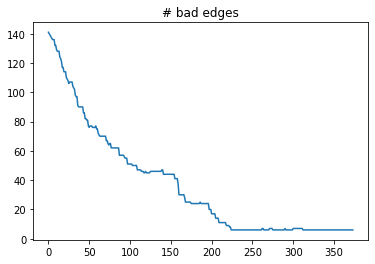

In [18]:
c, badVert, badEdges, times = mPW(g=g_dolphins, k=10, tol=0.00001)
plot_results(badVert, badEdges)

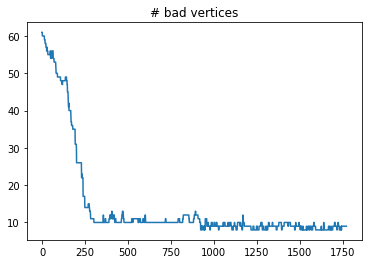

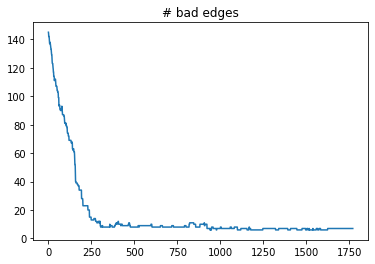

In [19]:
c, badVert, badEdges, times = mPW(g=g_dolphins, k=10, window_size=150, tol=0.001)
plot_results(badVert, badEdges)

### Maximum number of steps exceeded (`step` $\geq$ `maxStep`)

Alternatively, we could also bound the maximum number of steps with the optional parameter `maxStep`.

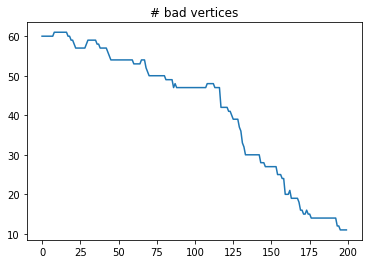

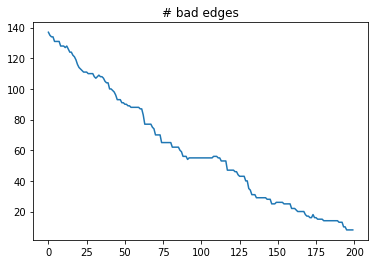

In [20]:
c, badVert, badEdges, times = mPW(g=g_dolphins, k=10, maxStep=200)
plot_results(badVert, badEdges)

### Combined criteria

Or even use both stopping criteria.

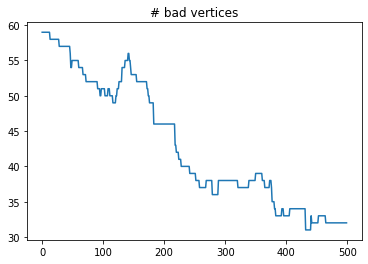

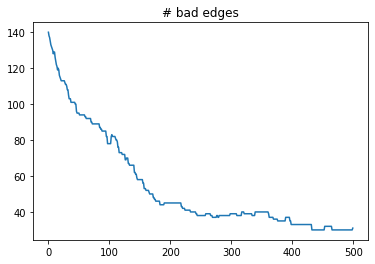

In [21]:
c, badVert, badEdges, times = mPW(g=g_dolphins, k=10, maxStep=500, window_size=200, tol=0.0001)
plot_results(badVert, badEdges)